# Question Number : 2

## Loading the dataset

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
#Loading the dataset
df = pd.read_csv('data.csv')

In [3]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
for c in df.columns:
    print(df[c].value_counts())
    print("\n\n")

Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64



Gender
Male      222
Female    166
Name: count, dtype: int64



Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64



Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64



Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64



Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64



Family size
3    117
2    101
4     63
5     54
6     29
1     24
Name: count, dtype: int64



latitude
12.9770    36
12.9783    16
12.9850    14
12.8845    12
12.9369    11
           ..
13.0

In [5]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


## Data Visualization and analysis

In [7]:
df['Monthly Income'].value_counts()
# have data in form of strings should be converted to numerical data

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Family size'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'Pin code'}>, <Axes: >]], dtype=object)

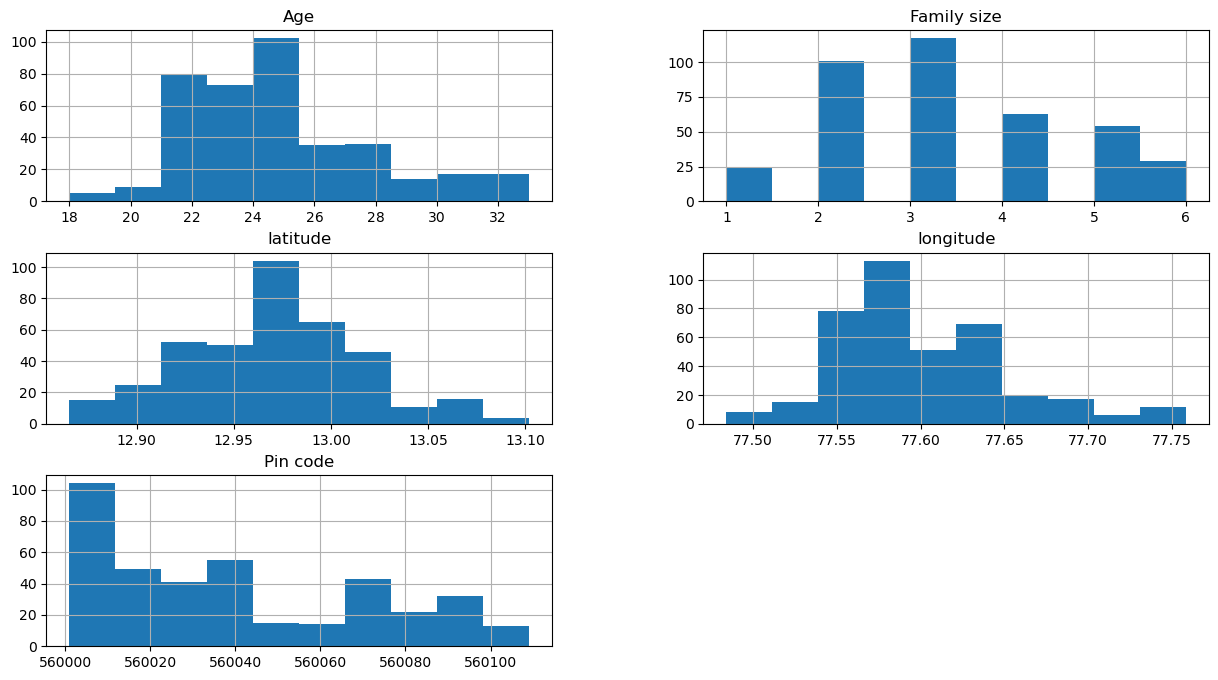

In [8]:
df.hist(figsize = (15, 8))

In [9]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [10]:
categorical_columns = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications']
numerical_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code', 'Output', 'Feedback']

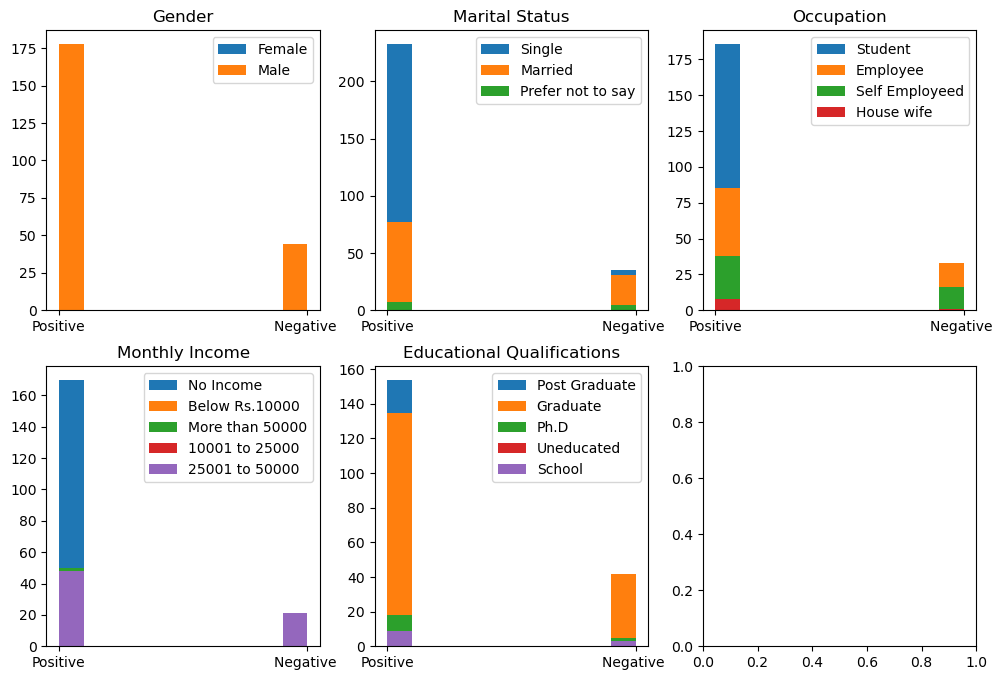

In [11]:
fig, axes = plt.subplots(2, 3, figsize = (12, 8))
for column, axis in zip(categorical_columns, axes.ravel()):
    axis.set_title(column)
    for i in df[column].unique(): 
        sliced_data = df[df[column] == i]
        axis.hist(sliced_data['Feedback'], label = i)
        axis.legend()
plt.show()

## Preprocessing

In [12]:
#Dropping unnecessary columns
df = df.drop('Unnamed: 12', axis = 1)

In [13]:
for c in ['Output','Feedback']:
    print(df[c].value_counts())
    print("\n\n")

Output
Yes    301
No      87
Name: count, dtype: int64



Feedback
Positive     317
Negative      71
Name: count, dtype: int64





In [14]:
df['Output'] = df['Output'].replace({'No':0,'Yes':1})


In [15]:
df['Feedback'] =  LabelEncoder().fit_transform(df['Feedback'].values)

In [16]:
for c in ['Output','Feedback']:
    print(df[c].value_counts())
    print("\n\n")

Output
1    301
0     87
Name: count, dtype: int64



Feedback
1    317
0     71
Name: count, dtype: int64





In [17]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,1,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,1,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,1,0
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,1,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,1,1
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,1,1
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,1,1
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,1,1


In [18]:
#tranforming the categorical columns into numericals using label encoder
for column in categorical_columns:
    print("Transforming column ",column)
    le = LabelEncoder()
    le.fit(df[column])
    for i,j in enumerate(le.classes_):
        print(f"Labelling {j} as {i}")
    
    df[column] = le.transform(df[column])
    print("\n")

Transforming column  Gender
Labelling Female as 0
Labelling Male as 1


Transforming column  Marital Status
Labelling Married as 0
Labelling Prefer not to say as 1
Labelling Single as 2


Transforming column  Occupation
Labelling Employee as 0
Labelling House wife as 1
Labelling Self Employeed as 2
Labelling Student as 3


Transforming column  Monthly Income
Labelling 10001 to 25000 as 0
Labelling 25001 to 50000 as 1
Labelling Below Rs.10000 as 2
Labelling More than 50000 as 3
Labelling No Income as 4


Transforming column  Educational Qualifications
Labelling Graduate as 0
Labelling Ph.D as 1
Labelling Post Graduate as 2
Labelling School as 3
Labelling Uneducated as 4




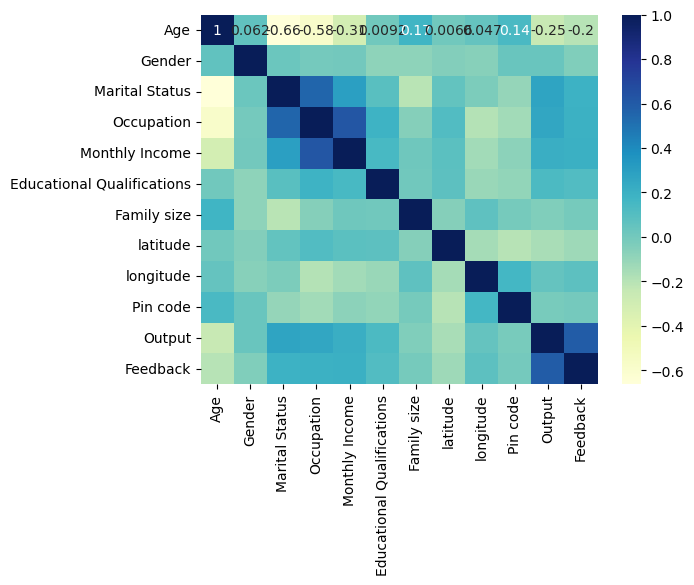

In [19]:
#Checking correlation 
corrplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

# displaying heatmap 
plt.show() 

## cannot infer anything from the correlation so using all the features in the model

In [20]:
Y = df.pop('Feedback')

In [21]:
X = df[df.columns]

In [22]:
Y.unique()

array([1, 0])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.15)

In [24]:
print(len(x_train),len(x_test))

329 59


In [25]:
y_train.value_counts()

Feedback
1    269
0     60
Name: count, dtype: int64

## Modeling

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix ,accuracy_score, roc_curve

The accuracy is 81.35593220338984%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.81      1.00      0.90        48

    accuracy                           0.81        59
   macro avg       0.41      0.50      0.45        59
weighted avg       0.66      0.81      0.73        59



/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


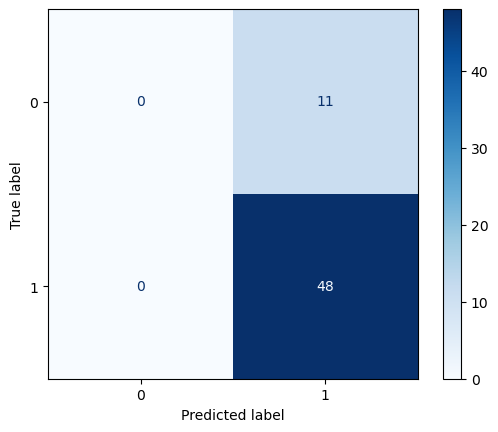

In [27]:
# Linear SVC
from sklearn import svm
m1 = svm.SVC()
m1.fit(x_train,y_train)
y_pred1 = m1.predict(x_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred1, pos_label=1)
print(f"The accuracy is {accuracy_score(y_test,y_pred1)*100}%")
print(classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = m1.classes_)
disp.plot(cmap = 'Blues')
plt.show()

The accuracy is 81.35593220338984%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.81      1.00      0.90        48

    accuracy                           0.81        59
   macro avg       0.41      0.50      0.45        59
weighted avg       0.66      0.81      0.73        59



/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


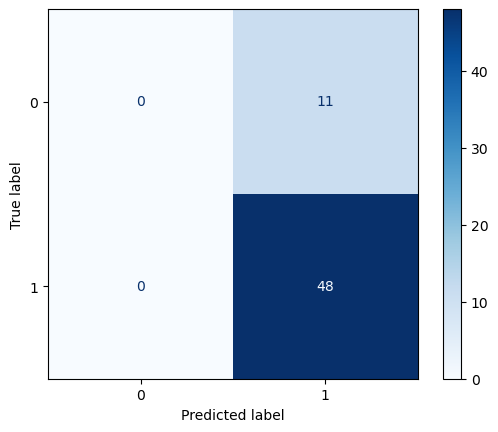

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

m2 = LogisticRegression()
m2.fit(x_train,y_train)
y_pred2 = m2.predict(x_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred2, pos_label=1)
print(f"The accuracy is {accuracy_score(y_test,y_pred2)*100}%")
print(classification_report(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = m2.classes_)
disp.plot(cmap = 'Blues')
plt.show()

The accuracy is 81.35593220338984%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.81      1.00      0.90        48

    accuracy                           0.81        59
   macro avg       0.41      0.50      0.45        59
weighted avg       0.66      0.81      0.73        59



/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


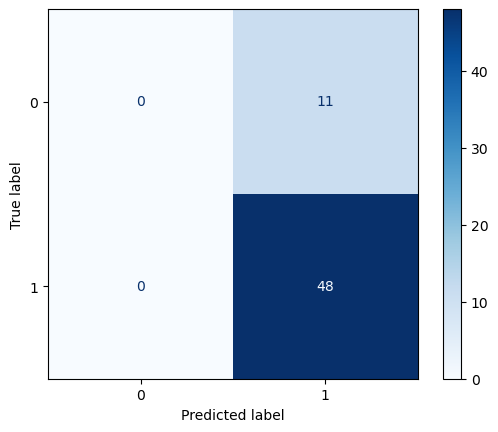

In [29]:
# K Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
m3 = KNeighborsClassifier(n_neighbors=2)
m3.fit(x_train,y_train)
y_pred3 = m2.predict(x_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred3, pos_label=1)
print(f"The accuracy is {accuracy_score(y_test,y_pred3)*100}%")
print(classification_report(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = m3.classes_)
disp.plot(cmap = 'Blues')
plt.show()

In [30]:
print(y_pred1,y_pred2,y_pred3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

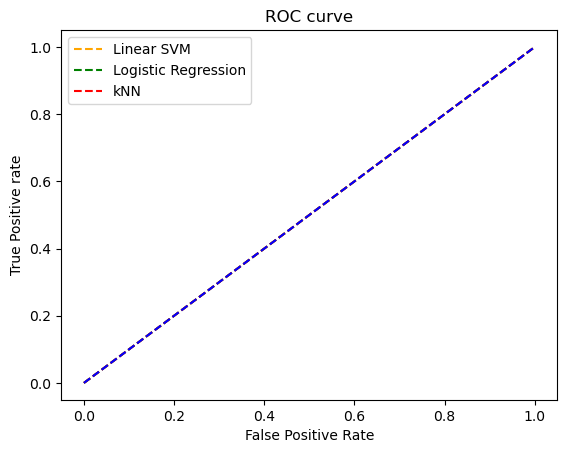

In [32]:
#plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Linear SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='kNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();